In [69]:
# -------------------------------------------------------------------------------------------------
# Import Packages
# -------------------------------------------------------------------------------------------------

# Basic packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
from pandas.plotting import register_matplotlib_converters
from scipy import stats
from patsy import dmatrices

#Statsmodels imports
import statsmodels.formula.api as smf
import statsmodels.api as sm


#Scikit learn imports
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split




In [3]:
# -------------------------------------------------------------------------------------------------
# Load data
# -------------------------------------------------------------------------------------------------

# Read in csv
df = pd.read_csv('weekly.csv')

df['real_date'] = pd.TimedeltaIndex(df['Date'], unit='d') + dt.datetime(1899, 12, 30)
register_matplotlib_converters()

df['fake'] = np.random.randint(0, 2, size = len(df))

# Glance at data
df.head()

,Year,Week,Date,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,real_date,fake
0,1990,1,32874,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,1990-01-01,1
1,1990,2,32881,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,1990-01-08,1
2,1990,3,32888,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,1990-01-15,1
3,1990,4,32895,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,1990-01-22,1
4,1990,5,32902,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,1990-01-29,1


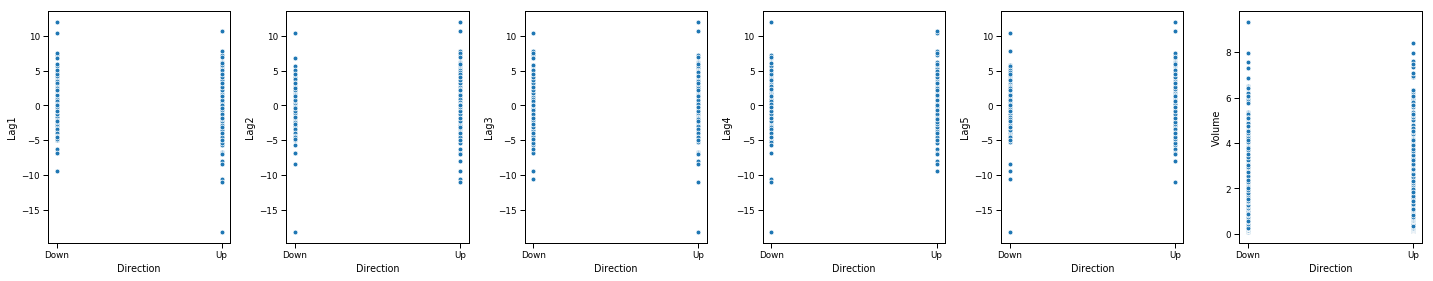

In [5]:
# -------------------------------------------------------------------------------------------------
# Initial graphing
# -------------------------------------------------------------------------------------------------

sns.set_context('paper', rc = {'sans-serif': 'Helvetica-Neue'})

fig, axs = plt.subplots(1, 6, figsize = (20,4))

g = df[df.Year < 2010]

sns.scatterplot(x = 'Direction', y = 'Lag1', data = g, ax = axs[0])
sns.scatterplot(x = 'Direction', y = 'Lag2', data = g, ax = axs[1])
sns.scatterplot(x = 'Direction', y = 'Lag3', data = g, ax = axs[2])
sns.scatterplot(x = 'Direction', y = 'Lag4', data = g, ax = axs[3])
sns.scatterplot(x = 'Direction', y = 'Lag5', data = g, ax = axs[4])
sns.scatterplot(x = 'Direction', y = 'Volume', data = g, ax = axs[5])
#sns.lineplot(x = 'real_date', y = 'Today', data = g, ax = axs[6])


plt.tight_layout()
plt.show()

In [10]:
# -------------------------------------------------------------------------------------------------
# First logistic regression
# -------------------------------------------------------------------------------------------------

#define formulas
formula = 'Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume'

#actual glm setup
model = smf.glm(formula = formula, data=df, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1089
Model:                                              GLM   Df Residuals:                     1082
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -743.18
Date:                                  Wed, 30 Oct 2019   Deviance:                       1486.4
Time:                                          14:54:25   Pearson chi2:                 1.09e+03
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
                 coef    std e

In [11]:
print("Coefficeients")
print(result.params)
print()
print("p-Values")
print(result.pvalues)
print()
print("Dependent variables") # can see that 'direction' is mapped to a dummy variable
print(result.model.endog_names)

Coefficeients
Intercept   -0.266864
Lag1         0.041269
Lag2        -0.058442
Lag3         0.016061
Lag4         0.027790
Lag5         0.014472
Volume       0.022742
dtype: float64

p-Values
Intercept    0.001899
Lag1         0.118144
Lag2         0.029601
Lag3         0.546924
Lag4         0.293653
Lag5         0.583348
Volume       0.537675
dtype: float64

Dependent variables
['Direction[Down]', 'Direction[Up]']


In [12]:
# look a predictions
predictions = result.predict()

# Print the first 10 predictions
print(predictions[0:10])

[0.39137506 0.39896856 0.41243005 0.51835844 0.38309871 0.43158098
 0.42139029 0.48480276 0.42848002 0.44457127]


In [13]:
#Need to map numbers into up and Down this uses list comprehensions
predictions_nominal = [ "Up" if x < 0.5 else "Down" for x in predictions]

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(df["Direction"], predictions_nominal))

# diagiona

[[ 54 430]
 [ 48 557]]


In [15]:
print(classification_report(df["Direction"], 
                            predictions_nominal, 
                            digits = 3))

              precision    recall  f1-score   support

        Down      0.529     0.112     0.184       484
          Up      0.564     0.921     0.700       605

   micro avg      0.561     0.561     0.561      1089
   macro avg      0.547     0.516     0.442      1089
weighted avg      0.549     0.561     0.471      1089



In [16]:
df.head()

,Year,Week,Date,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,real_date,fake
0,1990,1,32874,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,1990-01-01,1
1,1990,2,32881,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,1990-01-08,1
2,1990,3,32888,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,1990-01-15,1
3,1990,4,32895,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,1990-01-22,1
4,1990,5,32902,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,1990-01-29,1


In [17]:
# -------------------------------------------------------------------------------------------------
# Second logistic regression Q10d
# -------------------------------------------------------------------------------------------------

#define formulas
formula = 'Direction ~ Lag2'

#split data set into train and test cases
x_train = df[df.Year < 2009]
x_test = df[df.Year > 2008]

y_train = df[df.Year < 2009]['Direction']
y_test = df[df.Year > 2008]['Direction']


#actual glm setup
model = smf.glm(formula = formula,
                data = x_train,
                family = sm.families.Binomial())
result = model.fit()
print(result.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                  985
Model:                                              GLM   Df Residuals:                      983
Model Family:                                  Binomial   Df Model:                            1
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -675.27
Date:                                  Wed, 30 Oct 2019   Deviance:                       1350.5
Time:                                          14:54:35   Pearson chi2:                     985.
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
                 coef    std e

In [18]:
#---------------------------
# Test model on predictions
# --------------------------

#look at predictions with test set of data year > 2008
predictions = result.predict(x_test)

#Code a variable 
predictions_nominal = ['Up' if x < 0.5 else 'Down' for x in predictions]

#Print out of classification matrix
print(classification_report(y_test,
                           predictions_nominal,
                           digits = 3))

print(confusion_matrix(y_test, predictions_nominal))

              precision    recall  f1-score   support

        Down      0.643     0.209     0.316        43
          Up      0.622     0.918     0.742        61

   micro avg      0.625     0.625     0.625       104
   macro avg      0.633     0.564     0.529       104
weighted avg      0.631     0.625     0.566       104

[[ 9 34]
 [ 5 56]]


In [21]:
#---------------------------
# Linear discriminant analysis
#
# Model setup
# --------------------------

#split data set into train and test cases

# Key thing is to select the training data set better using .loc function
x_train = df[df.Year < 2009].loc[:, 'Lag1':'Lag5']
x_test = df[df.Year > 2008].loc[:, 'Lag1':'Lag5']

y_train = df[df.Year < 2009]['fake']
y_test = df[df.Year > 2008]['fake']


lda = LinearDiscriminantAnalysis()

#outputs an array of 0 and 1's
predictions = lda.fit(x_train, y_train).predict(x_test)

In [23]:
#---------------------------
# Linear discriminant analysis
#
# Model analysis
# --------------------------

# print the classification report and the confussion matrix

print(classification_report(y_test, predictions))

print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.42      0.62      0.50        48
           1       0.45      0.27      0.34        56

   micro avg       0.43      0.43      0.43       104
   macro avg       0.44      0.45      0.42       104
weighted avg       0.44      0.43      0.41       104

[[30 18]
 [41 15]]


In [37]:
#---------------------------
# Quadratic discriminant analysis
#
# Model setup
# --------------------------

#split data set into train and test cases

# Key thing is to select the training data set better using .loc function
x_train = df[df.Year < 2009].loc[:, 'Lag1':'Lag5']
x_test = df[df.Year > 2008].loc[:, 'Lag1':'Lag5']

y_train = df[df.Year < 2009]['fake']
y_test = df[df.Year > 2008]['fake']


QDA = QuadraticDiscriminantAnalysis()

#outputs an array of 0 and 1's
predictions = QDA.fit(x_train, y_train).predict(x_test)

#---------------------------
# Quadratic discriminant analysis
#
# Model analysis
# --------------------------

# print the classification report and the confussion matrix

print(classification_report(y_test, predictions))

print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.47      0.60      0.53        48
           1       0.55      0.41      0.47        56

   micro avg       0.50      0.50      0.50       104
   macro avg       0.51      0.51      0.50       104
weighted avg       0.51      0.50      0.50       104

[[29 19]
 [33 23]]


In [43]:
#---------------------------
# K-Nearest Neighbours
#
# Model setup
# --------------------------

#split data set into train and test cases

# Key thing is to select the training data set better using .loc function
x_train = df[df.Year < 2009].loc[:, 'Lag1':'Lag5']
x_test = df[df.Year > 2008].loc[:, 'Lag1':'Lag5']

y_train = df[df.Year < 2009]['fake']
y_test = df[df.Year > 2008]['fake']


KNN = KNeighborsClassifier(n_neighbors= 1)

#outputs an array of 0 and 1's
predictions = KNN.fit(x_train, y_train).predict(x_test)


#---------------------------
# KNN K =1 
#
# Model analysis
# --------------------------

# print the classification report and the confussion matrix

print(classification_report(y_test, predictions))

print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.35      0.35      0.35        48
           1       0.44      0.43      0.43        56

   micro avg       0.39      0.39      0.39       104
   macro avg       0.39      0.39      0.39       104
weighted avg       0.40      0.39      0.39       104

[[17 31]
 [32 24]]


In [ ]:
#Classification report from SciKit-Learn

# Prcision- what percentage of your predicitions were you correct?
#TP - true positive
#FP- False Positive

#Precision = TP/(TP + FP)

#recall - what percent of the positive cases did you catch/

# Recall = TP/(TP + FN)

#F1 score - what percent of positive perdictions were correct?

# F1 = 2*(Recall*Precision)/(Recall + Precision)

In [52]:
#---------------------------
# Q11 - Auto Data set
#
# Data import and classifier creation
# --------------------------

#import data
df = pd.read_csv('Auto.csv')

#create a median value of mpg
median_mpg = np.median(df['mpg'])

#use list comprehension to assign a high or low value in a new column
df['guzzler'] = [1 if x > median_mpg else 0 for x in df['mpg']]

df.head(n=20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,guzzler
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500,0
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala,0
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii,0
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina,0
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl,0


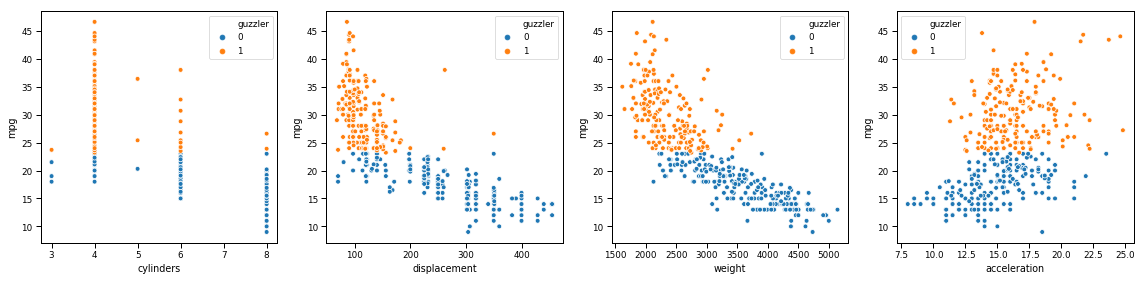

In [64]:
#---------------------------
# Q11 - Auto Data set
#
# Exploratory Data analysis - plotting
# --------------------------

sns.set_context('paper', rc = {'sans-serif': 'Helvetica-Neue'})

fig, axs = plt.subplots(1, 4, figsize = (16, 4))

sns.scatterplot(x = 'cylinders', y = 'mpg', hue = 'guzzler', data = df, ax = axs[0])
sns.scatterplot(x = 'displacement', y = 'mpg', hue = 'guzzler', data = df, ax = axs[1])
#sns.scatterplot(x = 'horsepower', y = 'mpg', hue = 'guzzler', data = df, ax = axs[2])
sns.scatterplot(x = 'weight', y = 'mpg', hue = 'guzzler', data = df, ax = axs[2])
sns.scatterplot(x = 'acceleration', y = 'mpg', hue = 'guzzler', data = df, ax = axs[3])

plt.tight_layout()

plt.show()

In [71]:
#---------------------------
# Q11 - Auto Data set
#
# LDA
# --------------------------

#x_vars = df.iloc[:, [1, 2, 4, 5]]
#y_vars = df['guzzler']

# Split data into training and test sets
# 2/3 for training, 1/3 for testing
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, [1, 2, 4, 5]], df['guzzler'], test_size = 0.33)

#initialize the model
LDA = LinearDiscriminantAnalysis()

#train the model and test
Predictions = LDA.fit(x_train, y_train).predict(x_test)

print(classification_report(Predictions, y_test))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        59
           1       0.96      0.89      0.92        73

   micro avg       0.92      0.92      0.92       132
   macro avg       0.92      0.92      0.92       132
weighted avg       0.92      0.92      0.92       132

